# Week 3: Perceptrons
#### by Rohan Pandey, Santa Cruz Artificial Intelligence

Today we'll be building a perceptron that predicts a Congressman's political party based on their voting record. You can read more about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). 

Let's first download the dataset from the database.

In [1]:
! curl http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data > ./voting.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18171  100 18171    0     0  11899      0  0:00:01  0:00:01 --:--:-- 11899


Because the data is currently stored as 'yes' and 'no' strings, we need to convert it to numerical data for our perceptron to handle.

In [2]:
from csv import reader

data, targets = [], []

# convert text into numbers
def convert(s):
  # YOUR CODE HERE
  if s == 'y' or s == 'republican': # this is arbitrary, the data just needs to be "binarified"
    return 1
  elif s == 'democrat':
    return 0
  else:
    return -1

# fetch data from csv
with open('voting.csv', 'r') as file:
  f = reader(file)
  for j in f:
    data.append([convert(i) for i in j])

# split data into data and targets
# YOUR CODE HERE
for j in range(len(data)):
  targets.append(data[j][0])
  data[j] = data[j][1:]

print(data)
print(targets)

[[-1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1], [-1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1], [-1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1], [-1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1], [1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1], [-1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1], [-1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1], [-1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1], [-1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1], [1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1], [-1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1], [-1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1], [-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1], [1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1], [-1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1], [-1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1], [1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1],

Let's start by creating a simple perceptron that takes inputs, weights, and a bias, and returns 1 or 0 as a prediction
.

In [0]:
def perceptron(inputs, weights, bias):
  # YOUR CODE HERE
  total = 0 # sigma term
  for x, w in zip(inputs, weights): # this can also be modeled as a dot product
    total += x * w # each feature weighted by its corresponding weight
  total += bias # add the bias
  # print(total)

  if total > 0: # activation function (threshold)
    return 1
  else:
    return 0

Now we'll write a training function that finds the optimal weights and biases. We also need a testing function to find the error given some weights and biases. Notice how much of the code is near direct translations of the math we discussed earlier.

In [0]:
import random

def train(data, targets, r=1):
  # YOUR CODE HERE
  w = [random.random() * 0.01 for i in range(len(data[0]))] # seed weights
  b = random.random() * 0.01 # seed biases
  
  for j, d in zip(data, targets):
    y = perceptron(j, w, b) # prediction
    loss = d - y # current model's error
    for i in range(len(w)):
      w[i] += r * loss * j[i] # update each weight
    b += r * loss # update bias

  return w, b # optimized weights and bias

def test(data, targets, w, b):
  # YOUR CODE HERE
  error = 0 # sigma error term
  for x, y in zip(data, targets):
    pred = perceptron(x, w, b)
    error += abs(y - pred) # absolute value so errors don't cancel out

  return error / len(targets)

With the functions written, we now just have to invoke them on our data and find the optimum weights and biases.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, targets, test_size=0.2, random_state=1)

w, b = train(X_train, Y_train)
error = test(X_test, Y_test, w, b)

print(w, b)
print(error)

[0.00763812314559198, -1.9902030377194504, -1.9991352574653396, 10.00320745624155, -1.9921599358400037, -1.9906907658909003, 0.009082562280727124, 0.007624182559085035, 0.009445412389770702, 2.001821810091611, -3.9995630958103163, 2.001312555642862, -3.995274297843748, -1.9967271187074438, -3.9983393794174256, 0.008121813343818118] -3.9965464186457176
0.08045977011494253


Last time, we introduced K in KNN as a parameter, as an introduction to the idea of Machine Learning and parametrization. It was actually a hyperparameter though, and we sometimes do things similar to the for-loop for K minimization with hyperparameters in other ML problems. 

Here, we're finding the optimum training rate *r* to arrive at the optimum model weights. What other hyperparameters do you think you could control to improve this model?

Optimal training rate: 0.04 0.034482758620689655


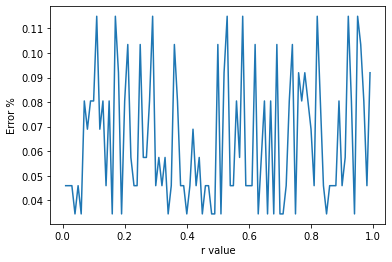

In [6]:
import matplotlib.pyplot as plt

errors = {}

for r0 in range(1, 100):
  r = r0 * .01
  w, b = train(X_train, Y_train, r)
  errors[r] = test(X_test, Y_test, w, b)

minErr = min(errors.items(), key=lambda x: x[1])
print('Optimal training rate:', minErr[0], minErr[1])

plt.plot(list(errors.keys()), list(errors.values()))
_, _ = plt.xlabel('r value'), plt.ylabel('Error %')

Now you can try voting using your personal political views to see if the model guesses your party correctly! It should theoretically be right about 95% of the time.

In [7]:
myVotes = []
print(perceptron(myVotes, w, b))

0
